In [2]:
import pandas as pd
import io
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.decomposition import PCA

In [3]:
all_data=pd.read_csv("Mortality_09_UP.data",nrows=25175)

C:\Users\Ritesh\AppData\Local\Temp\ipykernel_34016\251105449.py:1: DtypeWarning: Columns (16,17,18,22,23,24,25,26,27,28,29,30,31,32,33,76) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data=pd.read_csv("Mortality_09_UP.data",nrows=25175)


In [4]:
all_data

,id,m_id,client_m_id,hl_id,house_no,house_hold_no,state,district,rural,stratum_code,...,householdstatus,isheadchanged,fidh,fidx,as,wt,x,schedule_id,year,v126
0,712232,375.0,NaN,2944.0,63,3,9,58,1,1,...,NaN,NaN,NaN,2.944096e+10,-0.630351,68.37,NaN,4,1,NaN
1,712240,383.0,NaN,2997.0,28,1,9,58,1,1,...,NaN,NaN,NaN,2.997096e+10,-4.369212,68.37,NaN,4,1,NaN
2,109886,246.0,NaN,NaN,58,1,9,62,1,2,...,1.0,1.0,9.620340e+13,NaN,NaN,20.95,NaN,4,3,NaN
3,712216,359.0,NaN,2706.0,196,1,9,58,1,1,...,NaN,NaN,NaN,2.706096e+10,-2.996541,68.37,NaN,4,1,NaN
4,712224,367.0,NaN,2777.0,253,1,9,58,1,1,...,NaN,NaN,NaN,2.777096e+10,-3.951137,68.37,NaN,4,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25170,643135,410.0,401.0,6366.0,244,1,9,3,1,2,...,NaN,NaN,NaN,6.366090e+10,5.052841,54.85,NaN,4,1,NaN
25171,643143,938.0,1009.0,6483.0,66,1,9,3,1,2,...,NaN,NaN,NaN,6.483090e+10,0.292205,54.85,NaN,4,1,NaN
25172,102148,38.0,NaN,NaN,56,1,9,61,2,0,...,1.0,2.0,9.610740e+13,NaN,NaN,54.00,NaN,4,3,NaN
25173,643119,394.0,385.0,6140.0,34,1,9,3,1,2,...,NaN,NaN,NaN,6.140090e+10,-2.376460,54.85,NaN,4,1,NaN


In [5]:
columns = ["age","sex", "highest_qualification", "rural", "disability_status", "is_water_filter", "chew", "smoke", "alcohol","treatment_source"]
death = all_data[columns].copy()

In [6]:
for column in columns:
    death[column].fillna(death[column].mode()[0], inplace=True)


In [7]:
death.columns

Index(['age', 'sex', 'highest_qualification', 'rural', 'disability_status',
       'is_water_filter', 'chew', 'smoke', 'alcohol', 'treatment_source'],
      dtype='object')

In [8]:
death.isnull().sum()

age                      0
sex                      0
highest_qualification    0
rural                    0
disability_status        0
is_water_filter          0
chew                     0
smoke                    0
alcohol                  0
treatment_source         0
dtype: int64

In [9]:
death

,age,sex,highest_qualification,rural,disability_status,is_water_filter,chew,smoke,alcohol,treatment_source
0,43.0,1.0,4.0,1,0.0,2.0,7.0,4.0,4.0,0.0
1,70.0,2.0,0.0,1,0.0,2.0,5.0,4.0,4.0,9.0
2,57.0,2.0,3.0,1,0.0,2.0,7.0,4.0,4.0,0.0
3,50.0,1.0,0.0,1,0.0,2.0,1.0,1.0,1.0,9.0
4,65.0,2.0,0.0,1,0.0,2.0,7.0,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25170,38.0,1.0,4.0,1,0.0,2.0,3.0,4.0,4.0,9.0
25171,38.0,2.0,0.0,1,0.0,2.0,7.0,4.0,4.0,8.0
25172,42.0,1.0,0.0,2,0.0,2.0,1.0,1.0,4.0,6.0
25173,35.0,1.0,0.0,1,0.0,2.0,7.0,1.0,4.0,8.0


In [10]:
death.dtypes

age                      float64
sex                      float64
highest_qualification    float64
rural                      int64
disability_status        float64
is_water_filter          float64
chew                     float64
smoke                    float64
alcohol                  float64
treatment_source         float64
dtype: object

In [11]:
x=death.drop('age',axis=1)
y=death['age']

In [12]:
x.shape

(25175, 9)

In [13]:
x.dtypes

sex                      float64
highest_qualification    float64
rural                      int64
disability_status        float64
is_water_filter          float64
chew                     float64
smoke                    float64
alcohol                  float64
treatment_source         float64
dtype: object

In [14]:
y.shape

(25175,)

In [15]:
#train-test split
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(x,y ,random_state=104,test_size=0.25,shuffle=True)

In [16]:
X_train.shape

(18881, 9)

In [17]:
import tensorflow as tf


In [18]:
#Build model

model=tf.keras.Sequential()

In [33]:
import tensorflow as tf

bias=tf.keras.initializers.HeNormal()

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, kernel_initializer="he_normal", bias_initializer=bias, activation='sigmoid', input_shape=(9,)),
  tf.keras.layers.Dense(20, kernel_initializer="he_normal", bias_initializer=bias, activation='relu'),
  tf.keras.layers.Dense(1, kernel_initializer="he_normal", bias_initializer=bias, activation='swish', input_shape=(9,)),
])


In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                100       
                                                                 
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss=tf.keras.losses.MeanAbsoluteError(),metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [37]:
learning=model.fit(X_train,y_train,epochs=20,batch_size=16,verbose=True)

Epoch 1/20
1181/1181 [==============================] - 2s 1ms/step - loss: 12.6558 - root_mean_squared_error: 15.5540
Epoch 2/20
1181/1181 [==============================] - 1s 1ms/step - loss: 12.3249 - root_mean_squared_error: 15.0215
Epoch 3/20
1181/1181 [==============================] - 1s 1ms/step - loss: 12.3767 - root_mean_squared_error: 15.0431
Epoch 4/20
1181/1181 [==============================] - 1s 1ms/step - loss: 12.2405 - root_mean_squared_error: 14.9238
Epoch 5/20
1181/1181 [==============================] - 1s 1ms/step - loss: 12.2057 - root_mean_squared_error: 14.8723
Epoch 6/20
1181/1181 [==============================] - 1s 1ms/step - loss: 12.2342 - root_mean_squared_error: 14.8951
Epoch 7/20
1181/1181 [==============================] - 1s 1ms/step - loss: 12.2573 - root_mean_squared_error: 14.9542
Epoch 8/20
1181/1181 [==============================] - 1s 1ms/step - loss: 12.1107 - root_mean_squared_error: 14.7764
Epoch 9/20
1181/1181 [==========================

In [38]:
import matplotlib.pyplot as plt

In [39]:
def plot(learning):
  plt.plot(learning.history['loss'])
  plt.xlabel("epochs")
  plt.ylabel("Cost")

  plt.show()


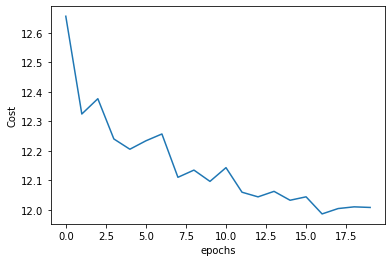

In [40]:
plot(learning)

In [30]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(9, 10) dtype=float32, numpy=
 array([[ 8.6028540e-01, -1.6636610e-01,  9.7300011e-01,  8.9534682e-01,
          3.8877627e-01, -4.7437495e-01,  1.0934664e+00,  1.1764530e+00,
          6.9098783e-01,  1.1581202e+00],
        [-3.2742262e-02, -9.8281389e-01, -2.2142351e-01,  8.0102688e-01,
          7.6709527e-01, -5.8828580e-01,  7.8341454e-01,  3.4000659e-01,
          4.2410094e-01,  7.6931232e-01],
        [ 9.3480015e-01, -1.1150360e+00,  6.2413794e-01,  4.5967653e-01,
          1.0495573e+00, -1.1411319e+00,  1.6416475e+00,  7.3380440e-01,
          9.1123837e-01,  6.4629364e-01],
        [ 1.0339028e-01,  3.3263966e-01, -1.6052571e-01,  6.8789917e-01,
          1.2965111e-01, -4.8107386e-01,  2.7710181e-01,  2.6191372e-01,
          1.4972895e-01, -5.1657957e-01],
        [ 1.2004646e+00, -3.6901928e-02,  1.2700311e+00,  3.2839820e-01,
          2.8119534e-01, -1.3993031e-01,  8.8492227e-01,  1.9564557e-01,
          7.2985733e-01,  6.2174970

In [46]:
model.save("Age_prediction")

INFO:tensorflow:Assets written to: Age_prediction\assets


In [48]:
from tensorflow.keras import models
model = models.load_model("Age_prediction")

In [49]:
model.predict(X_test)

197/197 [==============================] - 1s 1ms/step


array([[49.50834 ],
       [49.50834 ],
       [43.893433],
       ...,
       [49.50834 ],
       [49.50834 ],
       [43.893433]], dtype=float32)

In [55]:
dict_predict = {'sex' : {21: 1.0},
'highest_qualification' : {21 : 5.0},
'rural' : {21 : 1},
'disability_status' : {21 : 0.0},
'is_water_filter' : {21 : 2.0},
'chew' : {21 : 7.0},
'smoke' : {21 : 4.0 },
'alcohol' : {21 : 4.0 },
'treatment_source' : {21 : 9.0}}
X_trial = pd.DataFrame(dict_predict)

In [57]:
model.predict(X_trial)

1/1 [==============================] - 0s 144ms/step


array([[43.893433]], dtype=float32)